<h1>Math</h1>

we will begin by introducing KMeans
first consider the follwoing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
g1 = np.random.randn(N,2)+6
g2 = np.random.randn(N,2)
g3 = np.random.randn(N,2)
g3[:,0]+=6

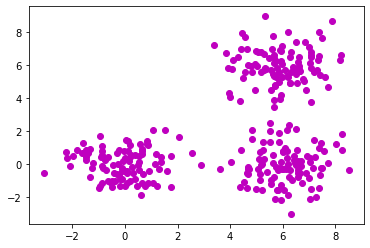

In [3]:
plt.scatter(g1[:,0],g1[:,1],c='m')
plt.scatter(g2[:,0],g2[:,1],c='m')
plt.scatter(g3[:,0],g3[:,1],c='m')
plt.show()

Now what do we notice ?

first all points are same color , we are doing unsupervised learning , that is no labels are given to these points , each point is a vector , just that

BUT we can notice that there appear to be three groups of data here

Thats why we call it unsupervised , we dont need labels to tell us that there are 3 different classes in the data

of course this data appears to be 'nice'

first data has only 2-D , unlike most real-world data , can we still recognise it in 10 different dimensions ?

KMeans is an automated algorithm for finding clusters/groups of data for any number of dimensions

also data shows 3 clusters clearly , but for other data it might not be that clear , so another thing we need to consider is how good our clusters are

now we need to consider 2 facts :

1) consider the following scenario

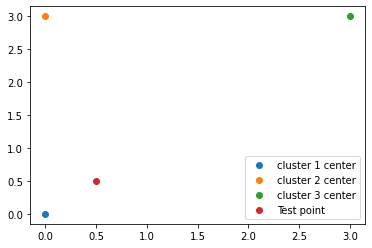

In [4]:
plt.scatter(0,0,label = 'cluster 1 center')
plt.scatter(0,3,label = 'cluster 2 center')
plt.scatter(3,3,label = 'cluster 3 center')
plt.scatter(0.5,0.5,label = "Test point")
plt.legend()
plt.show()

given the center of each cluster , and a test point (0.5,0.5) , which cluster does this point belong to ?

It should make intuitive sense that , to decide which cluster a point belongs to we choose the cluster with the closest center to that point , hence in our example , cluster 1

2) suppose we know points $x_1,....,x_c$ belong to same cluster how do we find center

well we know thats just the mean of these points ,geometrically named centroid , the rule is :

$$m = \frac{1}{C} \sum^{C}_{i=1}x_i$$

so for ex:

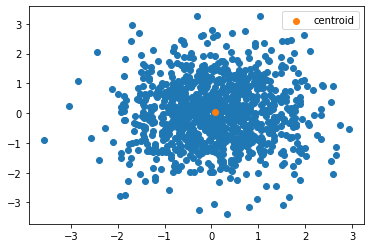

In [5]:
points = np.random.randn(1000,2)
centroid = points.mean(axis=0)
plt.scatter(points[:,0],points[:,1])
plt.scatter(centroid[0],centroid[1],label='centroid')
plt.legend()
plt.show()

Now knowing these 2 fundemental facts about clusters, how do we combine them to form an algorithm , well just repeat them over and over till conveergance !

so here is a recap

```
Initialise: pick K random points to be cluster center

while not converged:

    Assign each point to nearest cluster center
    
    Recalculcate each cluster center from points that belong to it
```

<h1>Math</h1>

now we will discuss soft k-means

one problem with k-means is that it is highly sensitive to its initialsiation , those are the K random points in the dataset that we chose to be our centroids at the begining

one possible solution is to run k-means several times and use whichever result gives us the best final cost (which we will see later) , but that tells us that the cost function is susceptible to local minima

one way to overcome this challenge is to have fuzzy relationships in each class , that is instead of a point fully belonging to one class or the other there is an amount of membership, so a point can be 60% part of cluster 1 and 40% belonging to cluster 2

so lets look at a psuedocode :



$ Initialise \ m_1,...,m_k \ = \ random \ points \ in \ X $

$ while \ not \ coverged \ :
    Step \ 1 \ : caluclate \ cluster \ responsibilities \: $
    
$$r_k^{(n)} = \frac{exp \left[ -\beta d(m_k,x^{(n)})\right] } {\sum_j exp \left [ -\beta d(m_j,x^{(n)}) \right ]} $$

$step \ 2 \ : Recalculate \ means :$
$$ m_k = \frac{\sum_n r_k^{(n)}x^{(n)}} { \sum_n r_k^{(n)}}$$

note : the notation here $x^{(n)}$ here is the same as $x_n$

step 2 is just calculating a weighted mean , if $r_k^{(n)}$ is higher that means that this $x_n$ matters more to cluster k and thus should have  more influence on the calculation of the mean , $m$ refers to a centroid , so $m_k$ is centroid of cluster k 


in step 1 we calculate responsabilities , that is the amount of membership of the point to each class

we can see how $r_k^{(n)}$ is always a number between 0 and 1 , we can consider kmeans to be the case where $r_k^{(n)}$ is either 0 or 1

now we want to understand the equation since the notation can be confusing , we also want to get a deeper understanding of how it wokrs

$r_k^{n}$ is the responisbility of cluster k of point $x_n$ , so this is am easure of how much $x_n$ belongs to cluster k , 0 means no membership , 1 means full membership

$d(m_k,x^{(n)})$ is the distance between centroid of cluster k and point $x_n$

now lets reconsider the equation , we see how it depends on the distance between the point and centroids , this is logical since if a point is vary close to one centroid and far from others we get a responsibility close to  1 and responsibility of other classes of this point becomes low , so the probability that it belongs to the class with the high responsibility is also high

consider if a point is right in the middle between 2 clusters(centroids) , it would get a responsibility of 0.5 for each class , which makes sense , because we are equally confident that this point can belong to either of 2 clusters , so this method allows us to quantify our confidence in cluster assignements rather than just assign to closest cluster

thats great , but why the exp ?

$$r_k^{(n)} = \frac{exp \left[ -\beta d(m_k,x^{(n)})\right] } {\sum_j exp \left [ -\beta d(m_j,x^{(n)}) \right ]} $$


Gaussian PDF:

$$ f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( \frac{-1}{2\sigma^2}(x-\mu)^2\right)$$

clearly the numerator for the equation in the responsibility looks like a gaussian , which will be discussed later in GMMs , in the same way a gaussian has a variance that controls how fat or skinny the pdf of the gaussian is  , we will see how that will aslo control how fat or skinny the influence of each cluster will be on every data point


back to step 2 , 

in step 2 we calculate the weighted arithmetic mean , once again this makes sense since if a point is far from cluster it shouldnot influence the cluster that much

$$Regular mean: m_k = \frac{1}{N}\sum_n x^{(n)} = \frac{1*x^{(1)} + 1*x^{(2)} + ...}{1+1+...}$$


$$Weighted \ mean: m_k = \frac{\sum_n r_k^{(n)} x^{(n)}} {\sum_n r_k^{(n)}} =  \frac{ r_k^{(1)} x^{(1)} + r_k^{(2)} x^{(2)}}{r_k^{(1)} + r_k^{(2)} + ...}$$

as we said , soft kmeans reflects our confidence in the cluster assignement , consider the follwoing example :


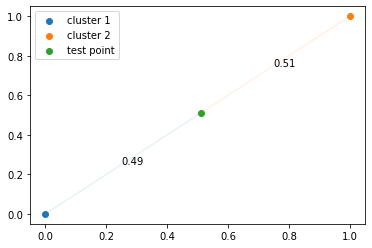

In [6]:
plt.scatter(0,0,label = 'cluster 1')
plt.scatter(1,1,label = 'cluster 2')
plt.scatter(0.51,0.51,label = 'test point')
plt.plot([0,0.5],[0,0.5],alpha=0.1)
plt.plot([0.5,1],[0.5,1],alpha=0.1)
plt.text(0.75,0.75,'0.51')
plt.text(0.25,0.25,'0.49')
plt.legend()
plt.show()

consider this example , a point is just in the centre of 2 clusters , then we move it a little bit , just one percent towards the orange cluster 

normally kmeans ('hard kmeans') would assign it to cluster orange , but intuitevly we know it should not really be assigned to cluster to the right since it is still mostly in the center

so hard kmeans would treat a point almost at the middle as a point which very close to centroid and both would have equal contribution to calculation of mean

<h1>Math</h1>

now we want to talk about the kmeans objective function

Assuming we are using euclidean distance as a measure of distance , then our cost is 

$$J = \sum_n \sum_k r_k^{(n)} {\Vert m_k - x^{(n)}\Vert}^2 $$

so our cost is the sum of squared distances weighted by responsabilities

so if $x^{(n)}$ is far away form cluster k , hopefully $r_k^{(n)}$ has been set to a low value

usually we optimise objective functions with gradient descenet , in fact what we are doing is called co-ordinate descent , that is we are moving towards a smaller value of J wrt only one variable at a time , this is true since we update only one variable at a time , either $m_k$ or $r_k^{(n)}$

There is a mathematical guarantee that J will decrease with each iteration , but not necessarily to a global minimum



<h1>code</h1>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
D = 2 # number of dimensions
s = 4 # how far apart means are
N = 900 # number of samples

# we will create 3 gaussian clouds

mu1 = np.array([0,0])
mu2 = np.array([s,s])
mu3 = np.array([0,s])

X = np.zeros((N,D))

X[:300,:] = np.random.randn(300,D) + mu1
X[300:600,:] = np.random.randn(300,D) + mu2
X[600:,:] = np.random.randn(300,D) + mu3


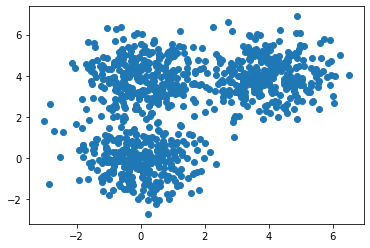

In [9]:
# plot points
plt.scatter(X[:,0],X[:,1])
plt.show()

In [10]:
class Kmeans:
    def d(self,x,y):
        diff = x-y
        return (diff*diff).sum(axis=1) # squared distance gave much better results than euclidean
    
    def cost(self,X,R,mu):
        _,K = R.shape
        cost = 0
        for k in range(K):
            cost += (R[:,k]*self.d(X,mu[k])).sum()
        return cost
    
    
    def fit(self,X,K,max_iter=20,beta=0.1,plot_costs=True,plot_clusters=True,plot_steps=False):
        N,D = X.shape
        R = np.zeros((N,K))
        #initialise centroids randomly
        idx = np.random.choice(N,K)
        mu = X[idx]
        costs = []
        
        
        if plot_steps: # plot step by step
            grid_width = 5
            grid_height = max_iter / grid_width + 1 
            random_colors = np.random.random((K,3))
            plt.figure()
            # print data
            colors = random_colors.mean(axis=0)
            colors = np.tile(colors, (N, 1))
            plt.subplot(grid_width, grid_height, 1)
            plt.scatter(X[:,0], X[:,1], c= colors)


        for i in range(max_iter):
            # calculate responsibilities
            for k in range(K):
                R[:,k] = np.exp(-beta*self.d(X,mu[k]))
            R = R/R.sum(axis=1,keepdims=True)

            # update means
            for k in range(K):
                mu[k] = (R[:,k].reshape(N,1)*X).sum(axis=0) / (R[:,k].sum())  
    
            cost = self.cost(X,R,mu)
            costs.append(cost)
            
            if plot_steps: # now print after making update
                colors = R.dot(random_colors)
                plt.subplot(grid_width, grid_height, i+2)
                plt.scatter(X[:,0], X[:,1], c=colors)
            
            
            if i>0:
                if np.abs(costs[-1]-costs[-2]) < 0.1: # not much change in cost
                    break
        
        #plot steps
        if plot_steps: # show all plots
            plt.show()
        
        # plot costs
        if plot_costs:
            plt.plot(costs)
            plt.show()
            
        # plot final clustering:
        if plot_clusters:
            try:
                random_colors # see if it was already created by plot_steps so we follow same color scheme
            except:
                random_colors = np.random.random(size=(K,3))
            colors = R@random_colors #  so size is Nx3
            plt.scatter(X[:,0],X[:,1],c=colors)
            plt.show()
        

        

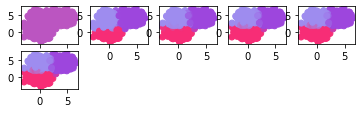

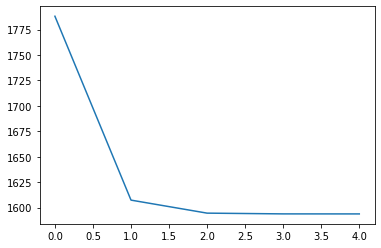

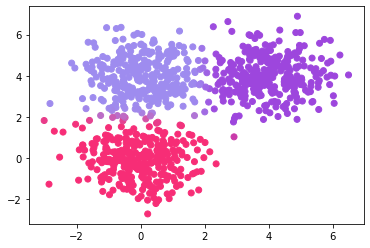

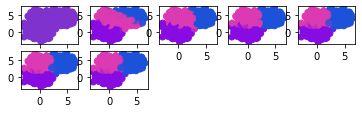

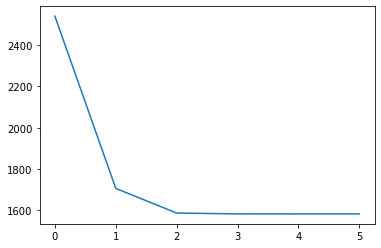

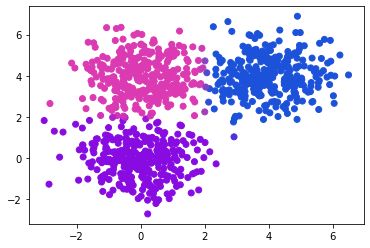

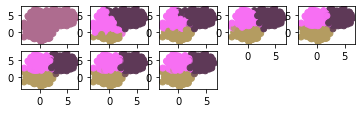

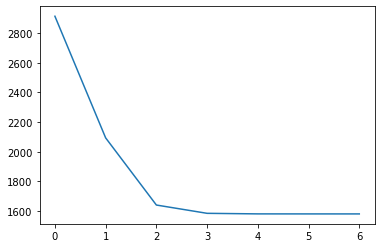

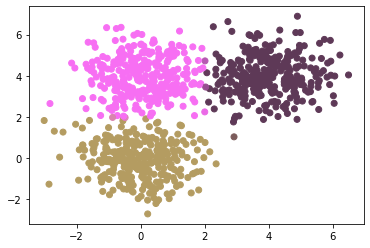

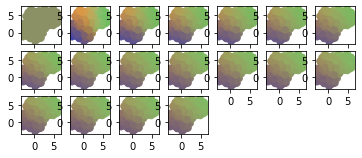

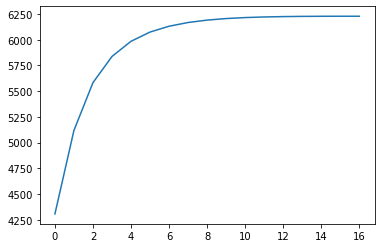

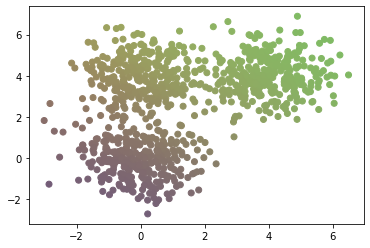

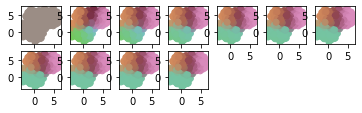

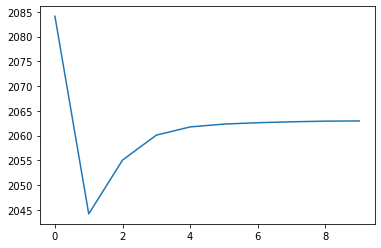

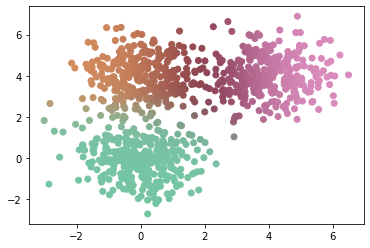

In [11]:
model = Kmeans()

K = 3 
model.fit(X, K, beta=1.0,plot_steps=True)

K = 3 # another beta
model.fit(X, K, beta=3.0,plot_steps=True)

K = 3 # another beta
model.fit(X, K, beta=10.0,plot_steps=True)

K = 5 # we dont know k
model.fit(X, K, max_iter=30,plot_steps=True)

K = 5 # # another beta 
model.fit(X, K, max_iter=30, beta=0.3,plot_steps=True)

note : after multiple runs , I noticed how the term $\beta$ can heavily affect cost
curve, in the mnist code section a $\beta = 0.1$ can even cause cost to increase when $\beta = 3$ would cause cost to decrease ,  in this example you can see for K = 5 , how $\beta$ = 0.1 causes cost to increase while a $\beta = 0.3$ causes cost to signnificantly decrease (though for this run cost increases again , also remember data is generated randomly)

<h1>code</h1>

In [12]:
# now we want to see an example in which kmeans fail
# one of them happens to be ... the donut problem !
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# now again for the donut problem 
def get_donut():
    N = 1000
    D = 2
    R_inner = 5
    R_outer = 10

    # in a polar system , this is the distance from origin
    # we sample from a uniform distribution , set mean to 0
    R1 = np.random.randn((N//2)) + R_inner
    # and this is the angle
    # 2pi * (number from 0-1) so we get thetas between 0-2*pi
    theta = 2*np.pi*np.random.random(N//2)
    # in a cartesian system x component is R cos theta , y component is R sin theta
    X_inner = np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

    R2 = np.random.randn((N//2)) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

    X = np.concatenate([X_inner , X_outer])
    T = np.array([0]*(N//2) + [1]*(N//2))
    
    return X,T

In [14]:
# run the KMeans class cell from previous code section first
model = Kmeans()

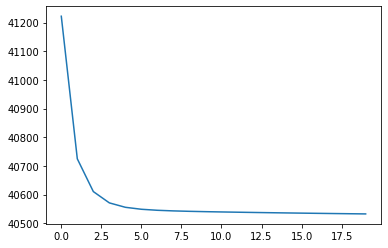

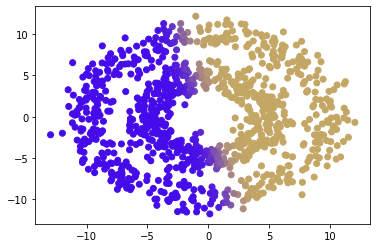

In [17]:
X,_ = get_donut()
model.fit(X, 2, plot_costs = True , plot_clusters=True)

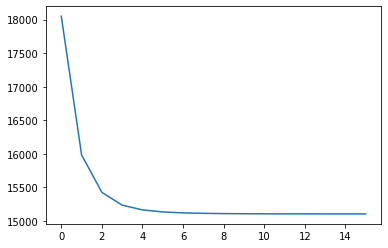

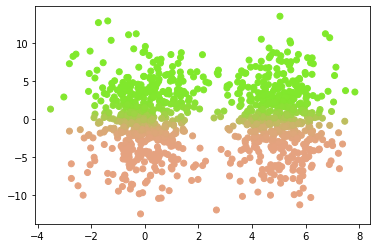

In [18]:
# failure , noitce how high the cost is
# second example is an elongated clusters

X = np.zeros((1000,2))
X[:500,:] = np.random.multivariate_normal([0,0],[[1,0],[0,20]],500)
X[500:,:] = np.random.multivariate_normal([5,0],[[1,0],[0,20]],500) 
# rememebr the diagonals of cov matrix are variances
# so in 1st dimension variance = 1
# in 2nd dimension variance = 20 , so it gets elongated in y dimension , stretched vertically
# changing the mean is just like shifting to right
model.fit(X, 2)

In [19]:
# matplotlib likes to scal graph
# notice gow the range of x is much smaller than that of y
# but with a correct scale they should appear elongated

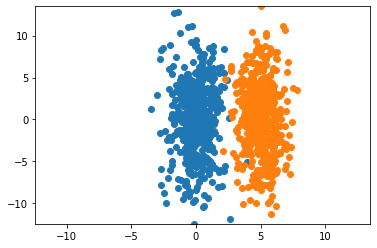

In [20]:
# actuall data
plt.scatter(X[:500,:][:,0],X[:500,:][:,1])
plt.scatter(X[500:,:][:,0],X[500:,:][:,1])
# we will limit x and y axis so matplotlib doesnot rescale graph
# this will allow us to see the graphs elongated
# we set both axis to have same range
# since y has a much larger variance , it will have a higher range
plt.xlim([X[:,1].min(),X[:,1].max()])
plt.ylim([X[:,1].min(),X[:,1].max()])
plt.show()

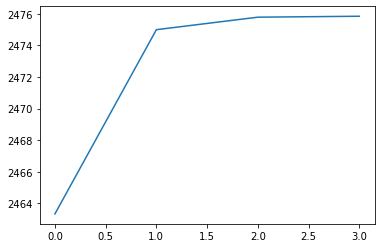

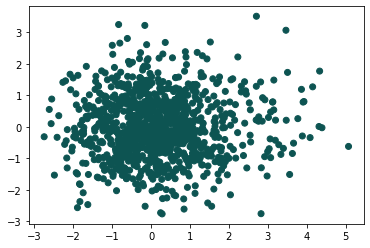

In [21]:
# the third example of failure is 2 clusters of different densities
X = np.zeros((1000,2))
X[:950,:] = np.array([0,0]) + np.random.randn(950,2)
X[950:,:] = np.array([3,0]) + np.random.randn(50,2)
model.fit(X, 2)

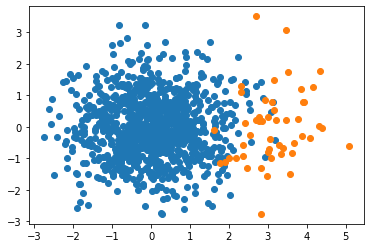

In [22]:
# notice how all the data was engilfed into one centroid
# error reaches 0 but we fail to cluster correctly
#actual data
plt.scatter(X[:950,:][:,0],X[:950,:][:,1])
plt.scatter(X[950:,:][:,0],X[950:,:][:,1])
plt.show()

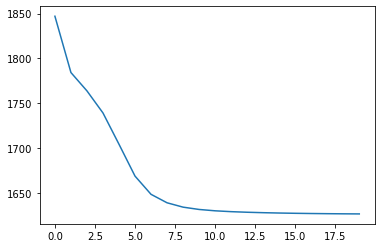

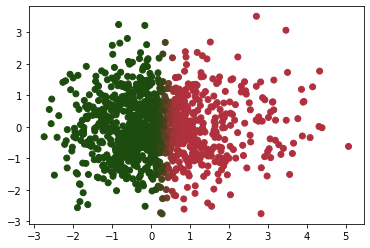

In [25]:
# but may be things change if we tweak beta
model.fit(X, 2, beta=3.0)

In [26]:
# also a failure

<h1>Math</h1>

Now we discuss the disadvantages of kmeans

1) Having to choose K

we can look at 2-D or 3-D data to help us choose , ok , but what about 100-D data

2) soltion may converge to a local minima

This is also happens in deep learning , so its not necessarily a bad thing , but when it happens in kmeans its bad ! 

one way to deal with this is to restart multiple times and choose the value which gives us best objective

3) sensitive to initial configuration

4) cant solve problems like donut problem

in fact in cant solve regular shapes like elipces either 

kmeans only takes into account squared distance , so it tends to look for spherical clusters (discuseed in detail later at GMMs)

5) does not take into account density

centroids are determined by means , if there is a part where a lot of the data resides , the mean will get close to that area

<h1>Math</h1>

Now we want to dicuss why our cost function is limited and what alternatives are available

Pros:

1) decreases on every round

2) Makes sense - we want points to be close to cluster center that it belongs to , so squared distance should be low when responsibility $\to$ 1

3) we want "low inrta-cluster distances" and "high inter-cluster distances"

Cons:

1) Really large data : Since the cost is the sum of all squared distance from each point to cluster center weighted by responsibility of that cluster and point combination , then the cost is going to grow with the size of the dataset , so for a really large data we will have a very large cost

2) Sensetive to Data : Data in range 0...1 , squared distances will be < 1 , but what if Data was in range ~10e6 , squared distance ~10e12 , so the cost we get is something like accuracy where it is a universal number no matter what data we use , its sensitive to data itself

3) Sensitive to K , if K = N (trivial case) , cost = 0

Sol:

1) The cost increases with size of data both in N and D , so we can divide by N and D to account for that

2) The scale affects cost , normalise data before doing Kmeans , ex: divide all data by global mean and standard deviation first

3) not so easy to adjust for 

we dont say that high K = overfitting , this is a concept useful in supervised learning where we have targets , but this is unsupervised learning we have no targets

One way to evaluate clusters is Purity:

$$Purity = \frac{1}{N} \sum^{N}_{k=1} {max}_{j=1..k} \vert c_k \cap t_j\vert$$

lets try to parse this formula :

1) we see it divides by N which is good since that means it balances for the number of samples we have

2) $c_k$ = data points that belong to cluster k

3) $t_j$ data points that belong to target class j

we search for the max over j , so we are looking for the target class that this cluster most likely belongs to since it has the biggest intersection of points , this would entail adjusting soft-kmeans which doesnot provide exact memership but is rather probabilisitc 

since we are doing soft-kmeans , we are not counting the number of points but summing up their responsibilities , so for each cluster k , we get all points that belong to a class j , and sum up their resonsibilities , do this for all classes , so j = 1,...,k and get max value for this cluster k , do this for all clusters k , some up max values of each cluster then divide by N

for ex: MNIST , each of the classes is a digit between 0-9 , we have 10 cluster centers , but no idea what they mean

for a cluster , we check all true targets , if we find max intersection is with class 5 , then this cluster probably represents cluster 5

max purity = 1 , for each cluster , all points inside it correspond to the same label

A big disadvantage is that it requires targets which is for supervised learning , so not so useful , should we have targets , we might as well try supervised learning instead


Other measures that require targets : Rand measure , F-measure , Jaccard Index , Normalised Mutual Information

Methods that require true labels are called "external validation" methods

One example of internal validation method , one that does not need labels is the Davies-Bouldin Index

$$DBI = \frac{1}{K} \sum^{K}_{k=1} {max}_{j\neq k} \left[ \frac {\sigma_k + \sigma_j} {d(c_k,c_j)}\right]$$

$\sigma_k$ represents average distance from each data point in cluster k to its center 

appropriatley denoted by $\sigma$ since its like a standard deviation (since we use soft-kmeans we want to use responsabilities when calculating distacnes)

d($c_k$,$c_j$) = distance from centerof cluster  k to center of cluster j

Ideally we want numerator to be small , denominator to be large

Everything within a cluster should be close together , this is represented by a smaller numerator

Clusters should be far apart , this is represented by a higher denominator

so lower DBI is better



<h1>code</h1>

In [27]:
# now lets try kmeans on mnist 
# but first we will ad some methods to kmeans class
# to calculate purity and DBI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [28]:
class Kmeans:
    def d(self,x,y):
        diff = x-y
        return (diff*diff).sum(axis=1) # squared distance gave much better results than euclidean
    
    def cost(self,X,R,mu):
        _,K = R.shape
        cost = 0
        for k in range(K):
            cost += (R[:,k]*self.d(X,mu[k])).sum()
        return cost
    
    
    def fit(self,X,K,max_iter=20,beta=3.0,plot_costs=True,plot_clusters=True,plot_steps=False):
        N,D = X.shape
        R = np.zeros((N,K))
        #initialise centroids randomly
        idx = np.random.choice(N,K)
        mu = X[idx]
        costs = []
        
        
        if plot_steps: # plot step by step
            grid_width = 5
            grid_height = max_iter / grid_width + 1 
            random_colors = np.random.random((K,3))
            plt.figure()
            # print data
            colors = random_colors.mean(axis=0)
            colors = np.tile(colors, (N, 1))
            plt.subplot(grid_width, grid_height, 1)
            plt.scatter(X[:,0], X[:,1], c= colors)


        for i in range(max_iter):
            # calculate responsibilities
            for k in range(K):
                R[:,k] = np.exp(-beta*self.d(X,mu[k]))
            R = R/R.sum(axis=1,keepdims=True)

            # update means
            for k in range(K):
                mu[k] = (R[:,k].reshape(N,1)*X).sum(axis=0) / (R[:,k].sum())  
    
            cost = self.cost(X,R,mu)
            costs.append(cost)
            
            if plot_steps: # now print after making update
                colors = R.dot(random_colors)
                plt.subplot(grid_width, grid_height, i+2)
                plt.scatter(X[:,0], X[:,1], c=colors)
            
            
            if i>0:
                if np.abs(costs[-1]-costs[-2]) < 0.1: # not much change in cost
                    break
        
        #plot steps
        if plot_steps: # show all plots
            plt.show()
        
        # plot costs
        if plot_costs:
            plt.plot(costs)
            plt.show()
            
        # plot final clustering:
        if plot_clusters:
            try:
                random_colors # see if it was already created by plot_steps so we follow same color scheme
            except:
                random_colors = np.random.random(size=(K,3))
            colors = R@random_colors #  so size is Nx3
            plt.scatter(X[:,0],X[:,1],c=colors)
            plt.show()
        
        # we will save these so we can calculate purity and DBI
        self.X = X
        self.mu = mu
        self.R = R
        

    def purity(self,Y):
        purity = 0
        R = self.R
        N,K = R.shape
        
        for y in range(K):
            max_intersection = 0
            for k in range(K):
                preds = np.argmax(R[Y==y],axis=1)
                intersection = (preds == k).sum()
                if intersection> max_intersection:
                    max_intersection = intersection
            purity += max_intersection
        return purity/N
    
    def dbi(self):
        X = self.X
        R = self.R
        mu = self.mu
        N,K = R.shape
        sigma = np.zeros(K)
        # calculate all sigmas first
        for k in range(K):
            dist = X - mu[k]
            euc = np.sqrt(self.d(X,mu[k])) # euclidean distance between each point and center k
            weighted_euc = R[:,k]*euc
            sigma[k] = weighted_euc.sum()/R[:,k].sum()
        
        DBI = 0
        for k in range(K):
            max_dbi = 0
            for j in range(K):
                if j == k:
                    continue
                dbi = (sigma[k]+sigma[j])/np.sqrt(mu[j]@mu[k])
                if dbi > max_dbi:
                    max_dbi = dbi
            DBI += max_dbi
        return DBI/K

In [29]:
def get_mnist(limit=None): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]/255.0
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting
    if limit is not None:
        X,Y = X[:limit] , Y[:limit]
    return X,Y

In [30]:
X,Y = get_mnist(10000)

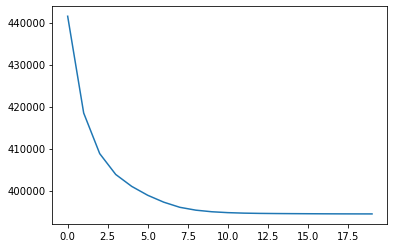

In [31]:
model = Kmeans()
model.fit(X,len(set(Y)),plot_clusters=False) 

In [32]:
print("purity : ",model.purity(Y)) # best is 1
print("DBI : ", model.dbi()) # best is 0

purity :  0.533
DBI :  2.4068600783278633


<h1>Math</h1>

now we will discuss one way that will help us choose K

usually we consider cross-validation for choosing hyperparameters , but since this unsupervised learning , we dont have labels and thus we dont have a notion for accuracy (though this migh be an idea to look into since we have cost)

rather we will consider a novel technique

we know that cost ALWAYS decreases as K increase , since cost = within cluster sum of squared error  , so the closer to center the lower the cost

but adding mode cluster centers (increasing K) , helps ALL points be closer to cluster center

consider an extreme scenario where K = N m number of cluster centers = number of points

each cluster will contain one data point , in fact the center of each cluster will be the data point and we get a cost = 0 

we observe an interesting behaviour as k=1...N 



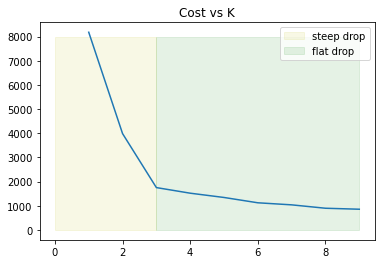

In [33]:
# this code is just to make the plot

import numpy as np
import matplotlib.pyplot as plt

D = 2 # number of dimensions
s = 4 # how far apart means are
N = 900 # number of samples

# we will create 3 gaussian clouds

mu1 = np.array([0,0])
mu2 = np.array([s,s])
mu3 = np.array([0,s])

X = np.zeros((N,D))

X[:300,:] = np.random.randn(300,D) + mu1
X[300:600,:] = np.random.randn(300,D) + mu2
X[600:,:] = np.random.randn(300,D) + mu3

costs = np.empty(10)
costs[0] = None
model = Kmeans()
for k in range(1,10):
    model.fit(X,k,plot_costs=False,plot_clusters=False)
    c = model.cost(model.X,model.R,model.mu)
    costs[k] = c
    
plt.plot(costs)
plt.fill_between([0,3],[8000,8000],alpha=0.1,color='y',label='steep drop')
plt.fill_between([3,9],[8000,8000],alpha=0.1,color='g',label='flat drop')
plt.legend()
plt.title('Cost vs K')

plt.show()

The cost vs K graph appears to have a Hockey-stick shape , begins with a sharp decrease then it becomes steady 

we can see how at some point increasing K yeilds only marginal improvement , in the graph above the steep drop in cost stops at k  = 3 

so the K at the corner of hockey-stick is sort of the natural clusters number , of course increasing K will still decrease the cost because of our discussion earlier , but not enough decrease to justify increase in K

of course there is no guarantee that the plot of cost vs K would produce the same shape each time